<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/Rough%20William%25R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv("/content/untitled",sep = "\t",index_col = 'Date',parse_dates= ['Date'])

In [193]:
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
import talib

In [194]:
# !pip install pyti

In [195]:
df['William%R'] = talib.WILLR(df.High, df.Low, df.Close, timeperiod=28)

In [196]:
pos_date = []
pos_Close = []
def find_pos_point(df):
  for i in range(1,len(df)):
    if (df['harami'][i] == 100):# and (df['cmf'][i]>0):
      pos_date.append(df.index[i])
      pos_Close.append(df.Close[i])
      print(f"{df.index[i]},{df.Close[i]}")


neg_date = []
neg_Close = []
def find_neg_point(df):
  for i in range(1,len(df)):
    if (df['harami'][i] == -100):# and (df['cmf'][i]<0):
      neg_date.append(df.index[i])
      neg_Close.append(df.Close[i])


In [197]:
# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
nine_period_high = df['High'].rolling(window= 9).max()
nine_period_low = df['Low'].rolling(window= 9).min()
df['tenkan_sen'] = (nine_period_high + nine_period_low) /2
# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high = df['High'].rolling(window=26).max()
period26_low = df['Low'].rolling(window=26).min()
df['kijun_sen'] = (period26_high + period26_low) / 2


# last_index = df.iloc[-1:].index[0]
# last_date = df['Date'].iloc[-1].date()
# for i in range(26):
#     df.loc[last_index+1 +i, 'Date'] = last_date + timedelta(days=i)

df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

high_52 = df['High'].rolling(window= 52).max()
low_52 = df['Low'].rolling(window= 52).min()
df['senkou_span_b'] = ((high_52 + low_52) /2).shift(26)

# most charting softwares dont plot this line
df['chikou_span'] = df['Close'].shift(-22) #sometimes -26 

# tmp = df[['Close','senkou_span_a','senkou_span_b','kijun_sen','tenkan_sen']].tail(300)
# ma = df['Close'].rolling(window = 14).mean()
# a1 = tmp.plot(figsize=(25,8))
# a1.fill_between(tmp.index, tmp.senkou_span_a, tmp.senkou_span_b,where = tmp.senkou_span_a>tmp.senkou_span_b,color = "green",alpha = .8)
# a1.fill_between(tmp.index, tmp.senkou_span_a, tmp.senkou_span_b,where = tmp.senkou_span_a<tmp.senkou_span_b,color = "red",alpha= .8)
# a2 = ma.plot(figsize = (25,8))

In [198]:
# !pip install celluloid
#!pip install ta

In [199]:
import ta
r = ta.trend.PSARIndicator(df.High,df.Low,df.Close)
a = r.psar_down()
b = r.psar_up()

In [200]:
e= ta.trend.EMAIndicator(df.Close, n = 50)
c = e.ema_indicator()

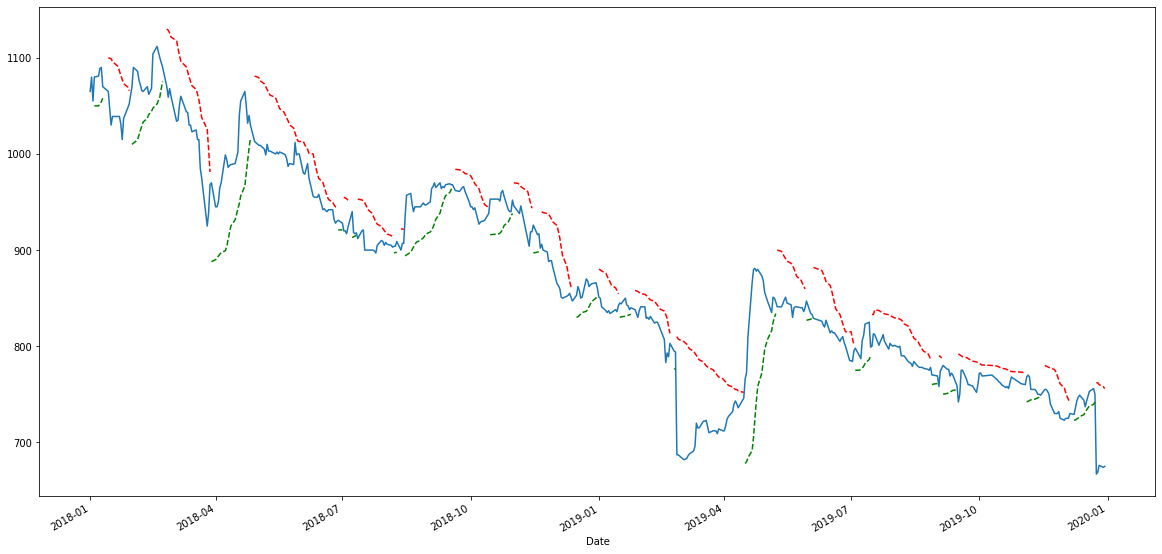

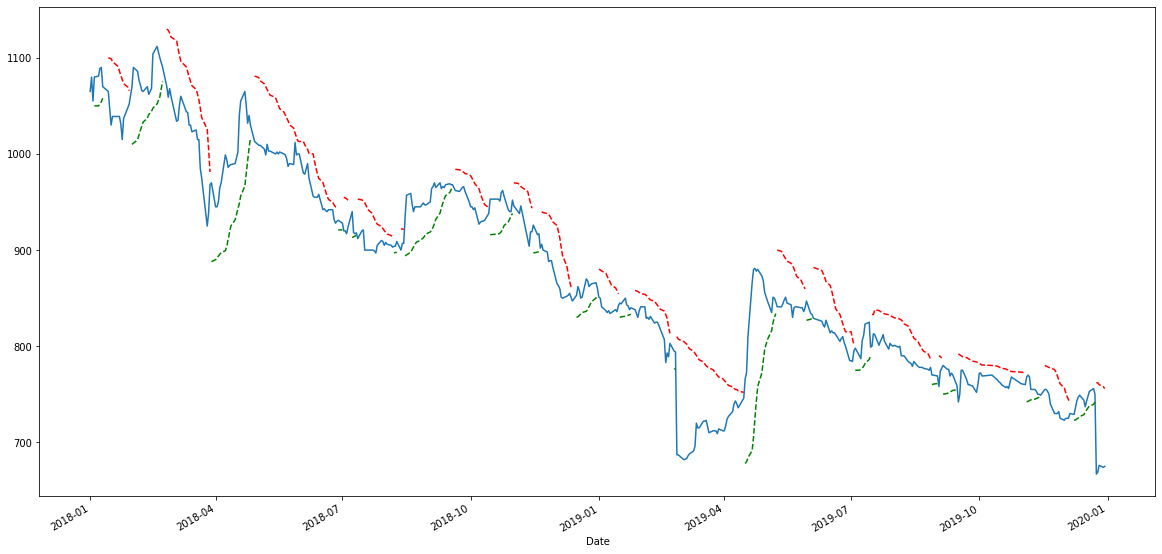

In [185]:
df['Close'].plot(figsize = (20,10))
plt.plot(a,"--",c= 'r')
plt.plot(b,"--",c= 'g')

In [201]:
# Fibonacci Levels considering original trend as upward move
price_max = df["Close"].max()
price_min = df['Close'].min()
diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

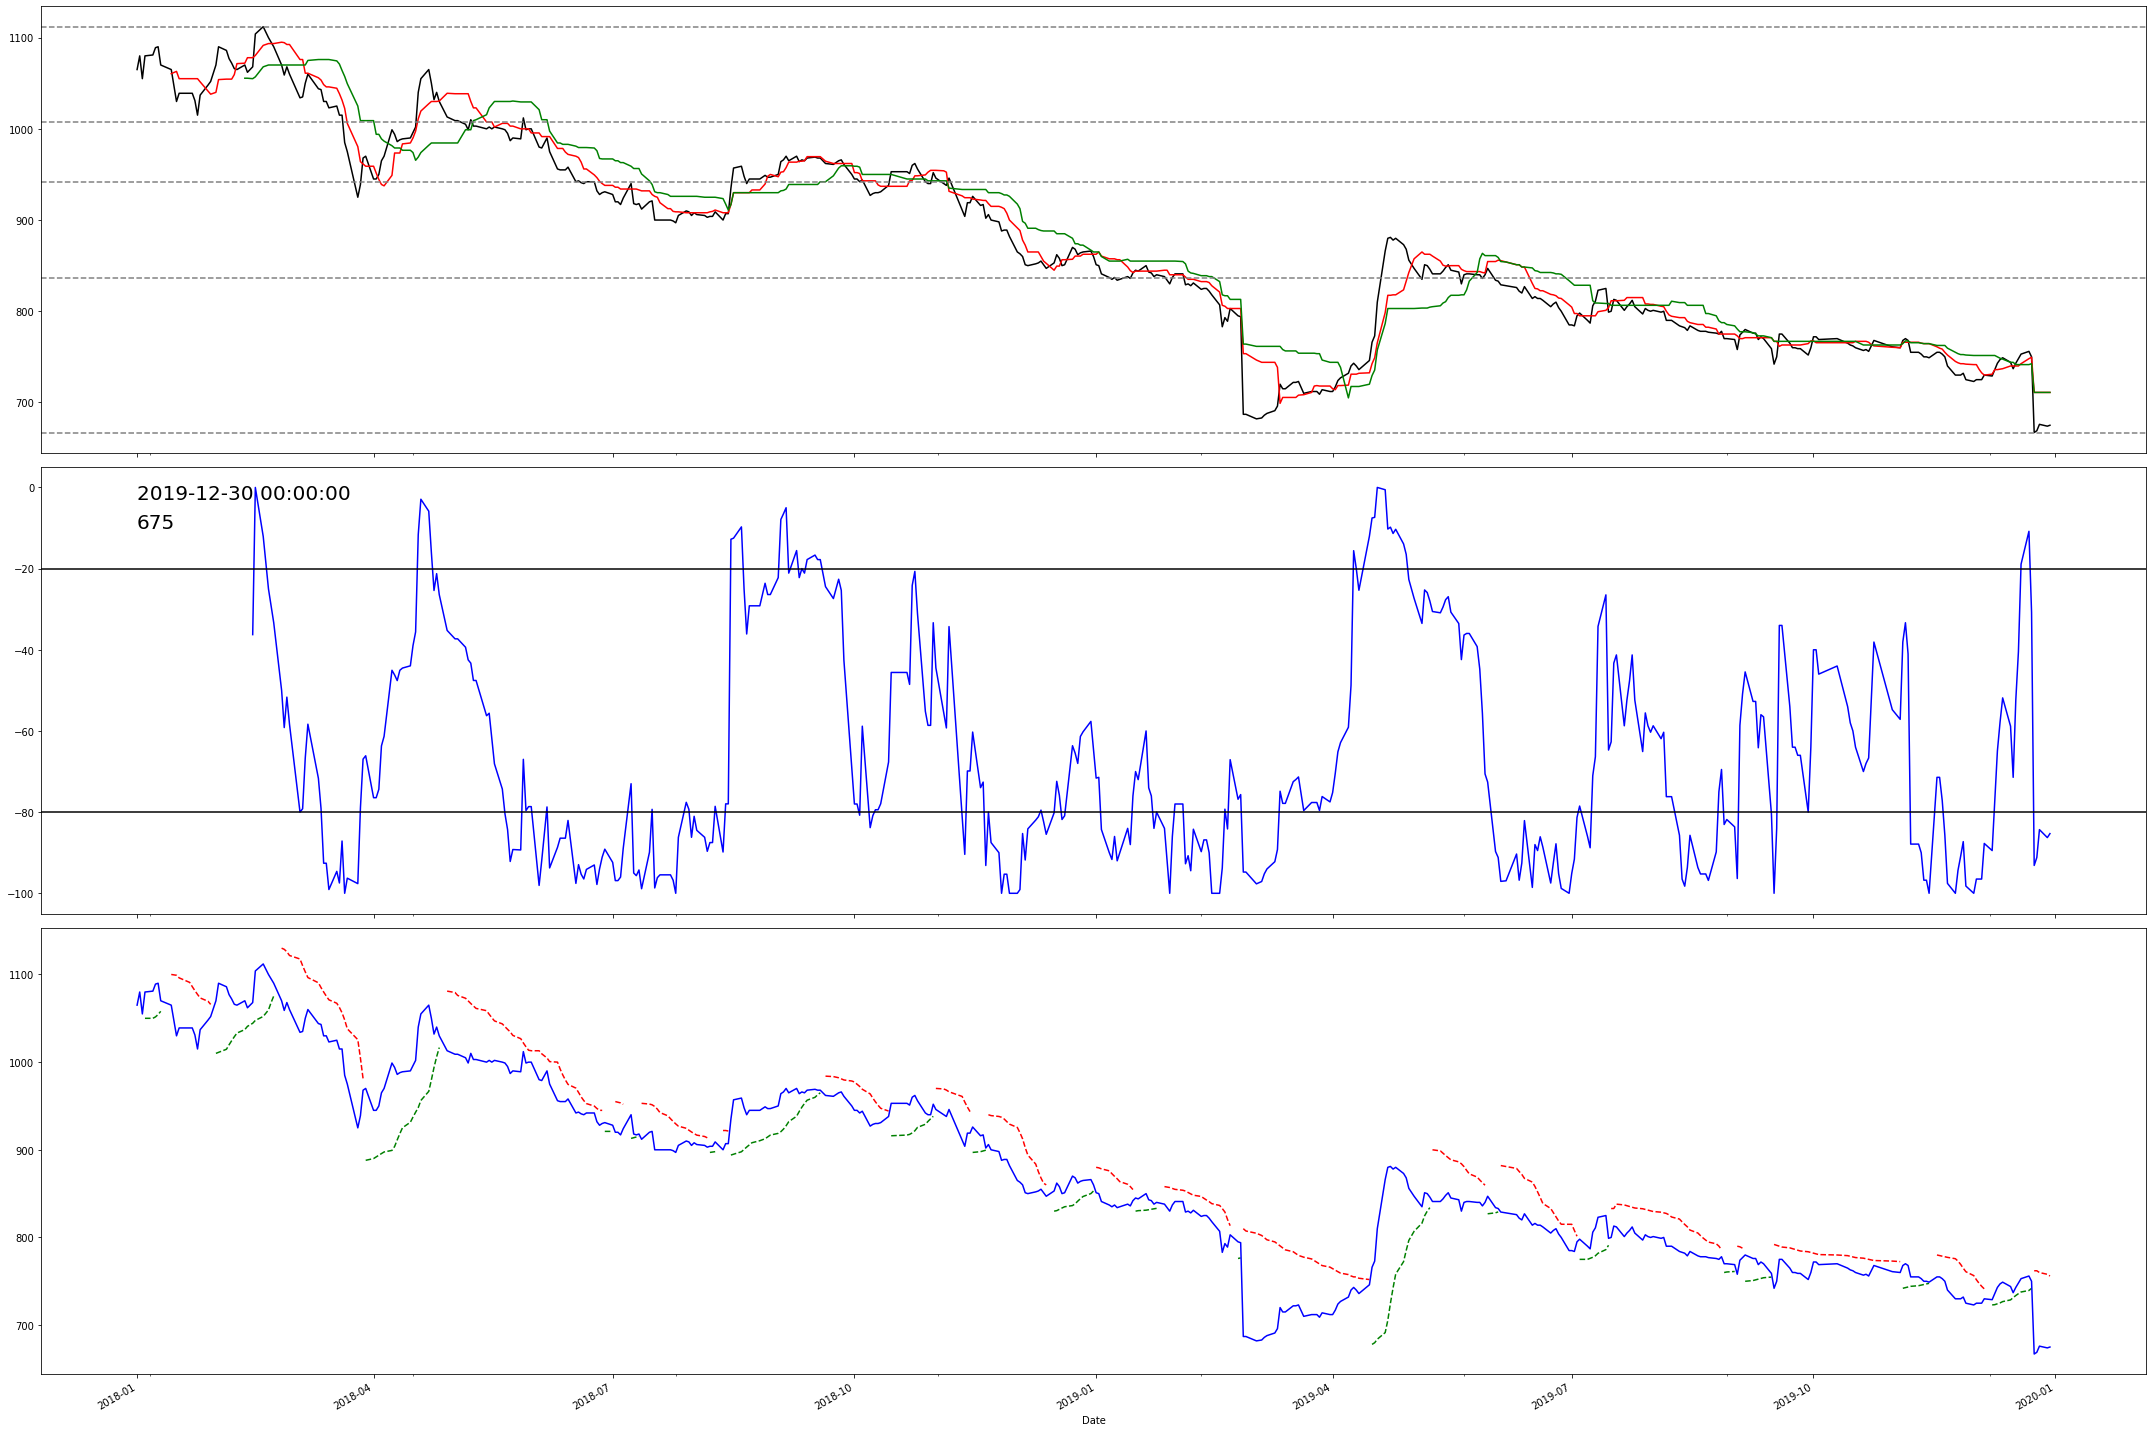

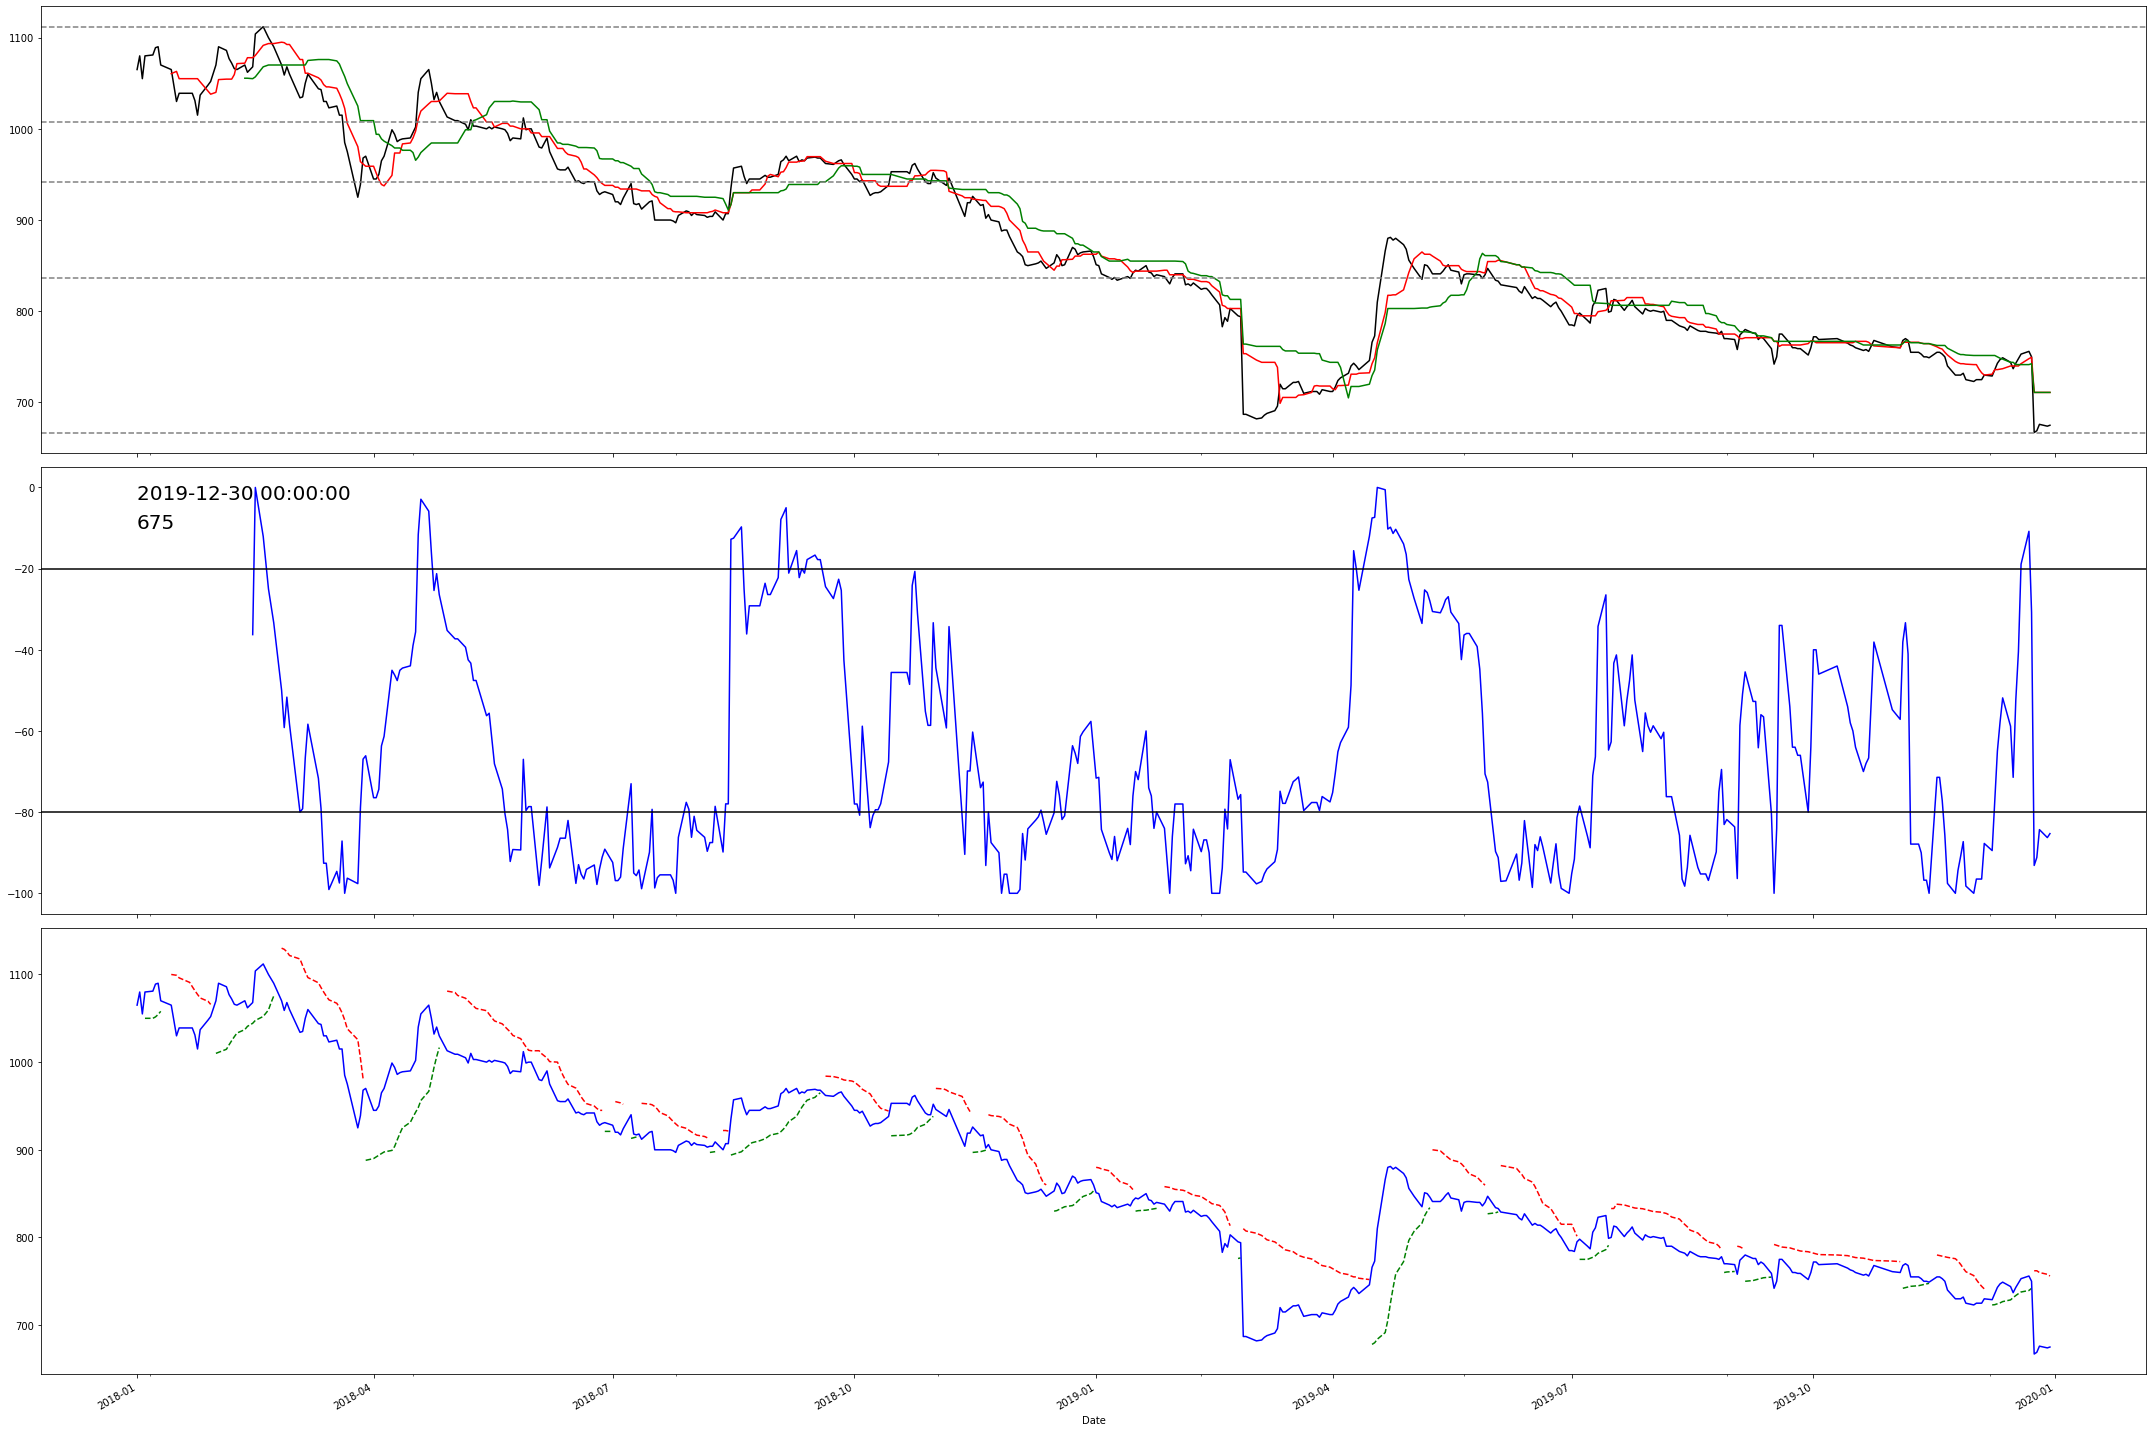

In [187]:

import matplotlib.dates as dates
# plt_dates = dates.date2num(t)
fig, axs = plt.subplots(3,figsize = (30,20), tight_layout = True,sharex = True)

f1 = df['Close'].plot(ax = axs[0],c = "black")
f2 = df['tenkan_sen'].plot(ax = axs[0], c= 'red')
f3 = df['kijun_sen'].plot(ax = axs[0],c = "green")
axs[0].axhline(price_max,color='grey',ls='--')
axs[0].axhline(price_min,color='grey',ls='--')
axs[0].axhline(level1,color='grey',ls='--')
axs[0].axhline(level2,color='grey',ls='--')
axs[0].axhline(level3,color='grey',ls='--')

axs[1].text(dates.date2num(df.index[0]),-10,f"{df['Close'][-1]}",size = 20)
axs[1].text(dates.date2num(df.index[0]),-3,f"{df.index[-1]}",size = 20)
f4 = df['William%R'].plot(ax = axs[1], color = "blue")
axs[1].axhline(-20,color='black')
axs[1].axhline(-80,color='black')
f5 = a.plot(ax= axs[2],ls = "--",c='r')
f6 = b.plot(ax= axs[2],ls = "--",c='g')
f7 = df['Close'].plot(ax= axs[2],c='b')
# axs[0].plot(df['Close'])
# axs[0].plot(df['tenkan_sen'],c = "red")
# axs[0].plot(df['kijun_sen'],c = 'green')
# plt.axhline(price_max,dates.date2num(df.index[0]),dates.date2num(df.index[-1]))
# #plt.hlines(price_min, dates.date2num(df.index[0]),dates.date2num(df.index[-1]))
# axs[1].plot(df['William%R'])
# plt.hlines(-80,dates.date2num(df.index[0]),dates.date2num(df.index[-1]))
# plt.hlines(-20,dates.date2num(df.index[0]),dates.date2num(df.index[-1]))
# plt.show()

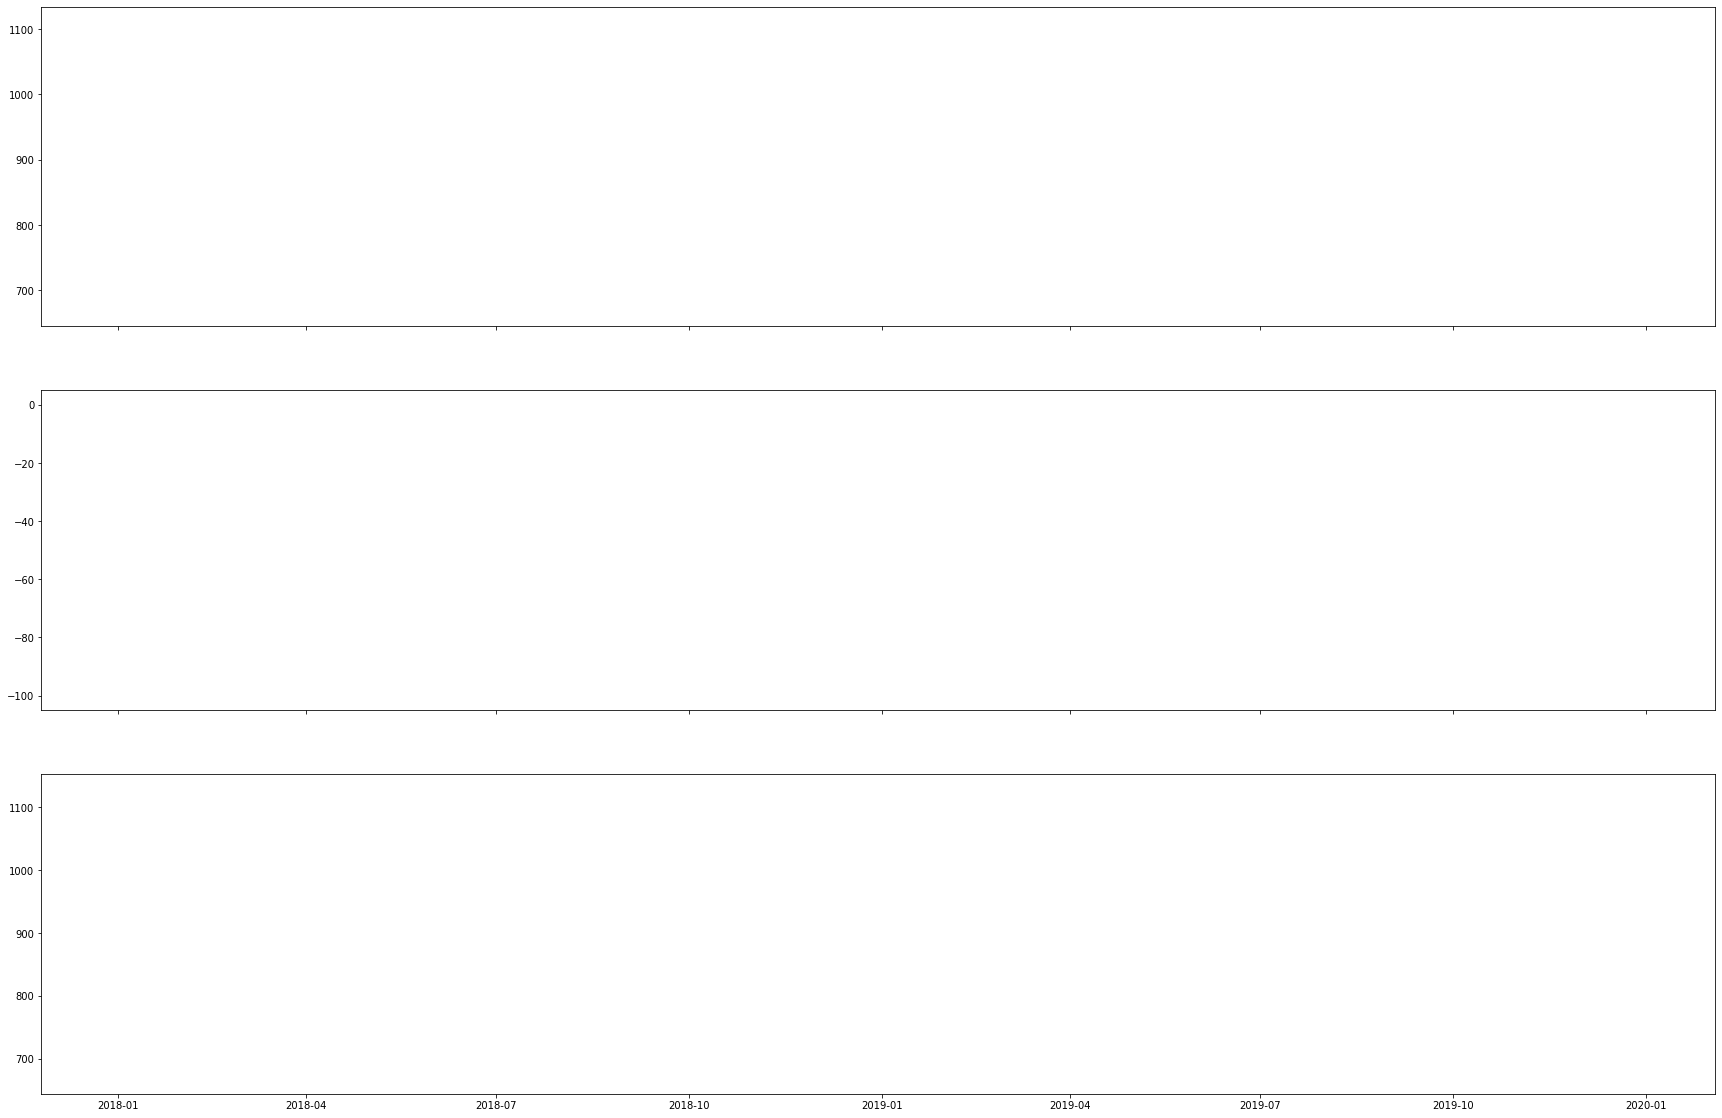

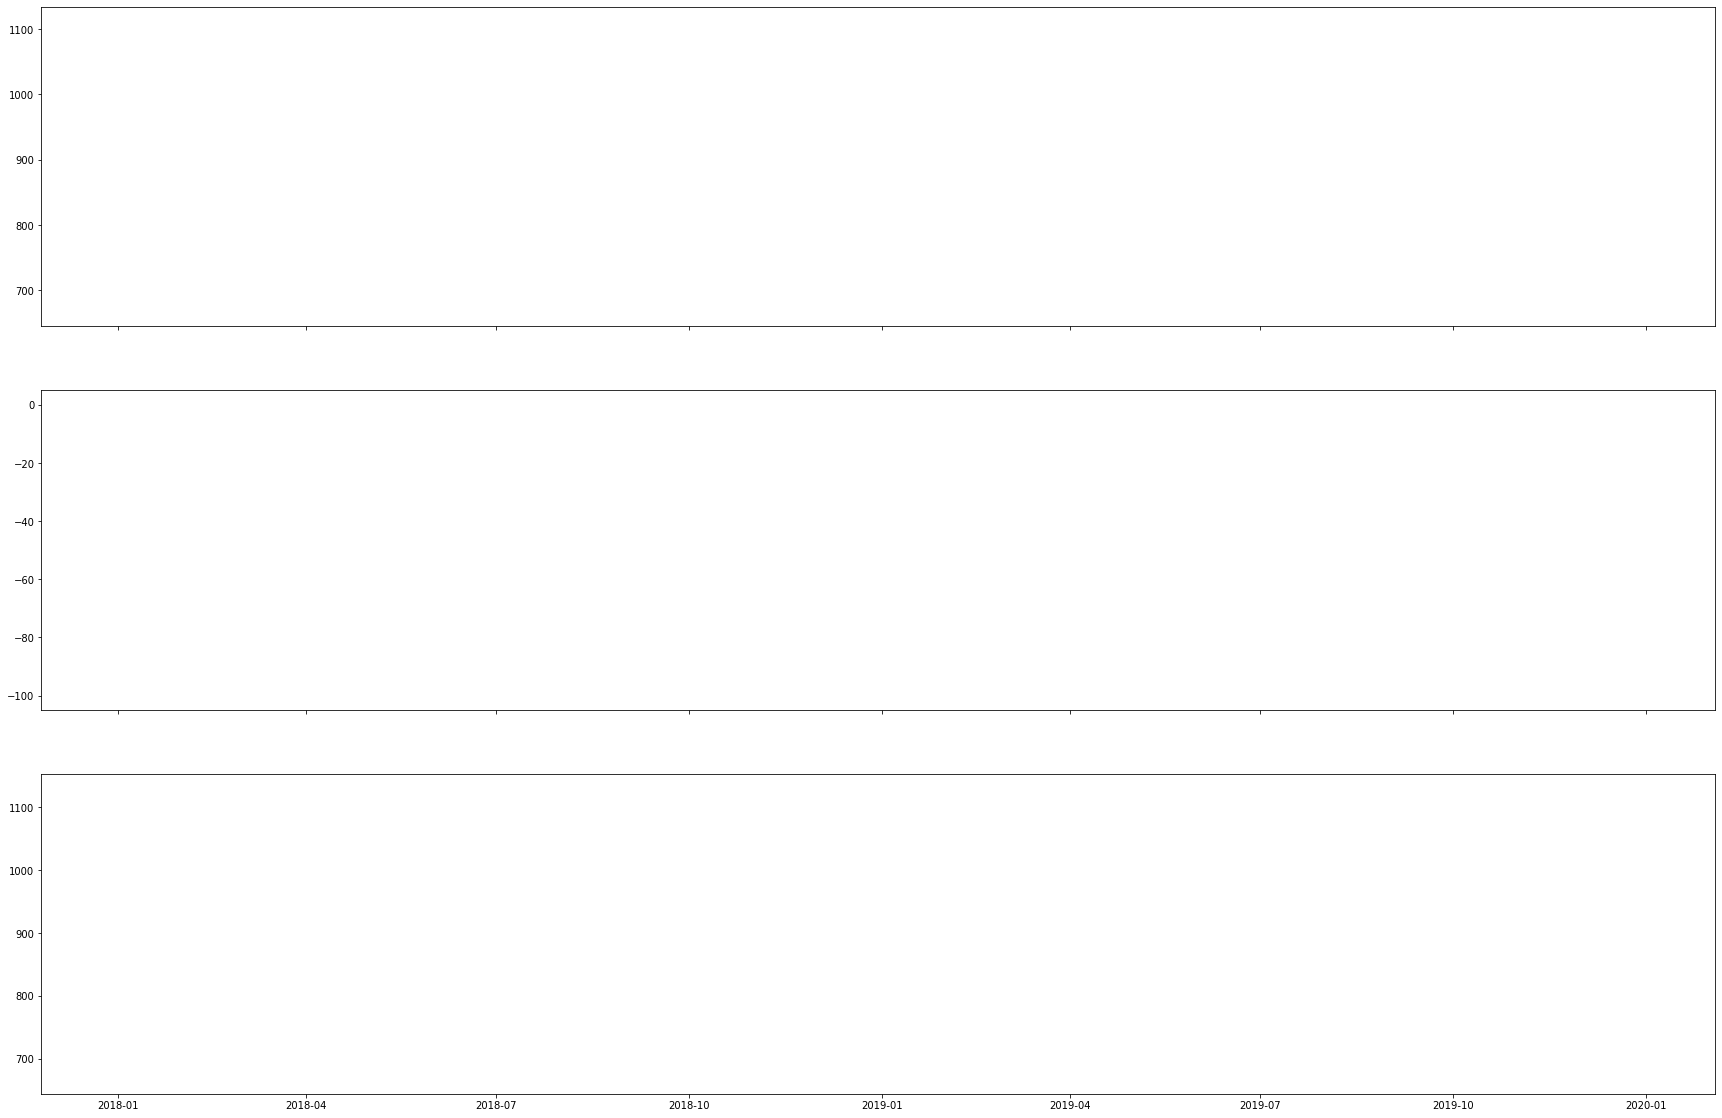

In [188]:
from celluloid import Camera
# import time
fig, axs = plt.subplots(3,figsize = (30,20),sharex = True)
camera = Camera(fig)
for i in range(0,len(df)-30):
  axs[0].plot(df['Close'][0:30+i],color= "black")
  axs[0].plot(df['tenkan_sen'][0:30+i],c = "red")
  axs[0].plot(df['kijun_sen'][0:30+i],c = 'green')
#  axs[0].axhline(price_max,color='grey',ls='--')
 # axs[0].axhline(price_min,color='grey',ls='--')
  axs[0].axhline(level1,color='grey',ls='--')
  axs[0].axhline(level2,color='grey',ls='--')
  axs[0].axhline(level3,color='grey',ls='--')
  axs[1].plot(df['William%R'][0:30+i],c = 'blue')
  axs[1].axhline(-20,color='black')
  axs[1].axhline(-80,color='black')
  axs[1].text(dates.date2num(df.index[0]),-10,f"{df['Close'][0:30+i][-1]}",size = 20)
  #axs[1].text(dates.date2num(df.index[0]),-3,f"{df.index[30+i]}",size = 20)
  axs[2].plot(a[0:30+i],ls='--',c = 'r')
  axs[2].plot(b[0:30+i],ls='--',c = 'g')
  axs[2].plot(df['Close'][0:30+i], c = 'b')
  axs[2].plot(c[0:30+i],c = 'grey')
  
  camera.snap()
animation = camera.animate()

In [189]:
animation.save('animation.mp4')


In [190]:
import os
print( os.getcwd() )
print( os.listdir() )

/content/ta-lib
['animation.mp4', 'HISTORY.TXT', 'ta-lib.dpkg.in', 'bin', '.ipynb_checkpoints', 'src', 'config.sub', 'ta-lib.dpkg', 'Makefile', 'autogen.sh', 'config.guess', 'Makefile.am', 'missing', 'ta-lib.spec', 'autom4te.cache', 'config.status', 'Makefile.in', 'ta-lib-config', 'configure', 'configure.in', 'ta-lib.spec.in', 'ta-lib-config.in', 'include', 'config.log', 'install-sh', 'CHANGELOG.TXT', 'ltmain.sh', 'depcomp', 'aclocal.m4', 'libtool']
/content/ta-lib
['animation.mp4', 'HISTORY.TXT', 'ta-lib.dpkg.in', 'bin', '.ipynb_checkpoints', 'src', 'config.sub', 'ta-lib.dpkg', 'Makefile', 'autogen.sh', 'config.guess', 'Makefile.am', 'missing', 'ta-lib.spec', 'autom4te.cache', 'config.status', 'Makefile.in', 'ta-lib-config', 'configure', 'configure.in', 'ta-lib.spec.in', 'ta-lib-config.in', 'include', 'config.log', 'install-sh', 'CHANGELOG.TXT', 'ltmain.sh', 'depcomp', 'aclocal.m4', 'libtool']
